In [1]:
from opensoundscape import CNN
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, multilabel_confusion_matrix, RocCurveDisplay, roc_curve, precision_recall_curve, PrecisionRecallDisplay
import torch

In [2]:
# # Run predictions for a list of epochs
# model_v = 'v33'
# epochs_predict = ['0']

# for epoch in epochs_predict:
#     # Load model
#     model_path = Path('model_training_checkpoints/model_' + model_v + '/epoch-' + epoch + '.model')
#     model = CNN.load(model_path)

#     # Load validation dataset
#     val_df_path = Path('model_training_checkpoints/model_' + model_v + '/val_df_' + model_v + '.csv')
#     val_df = pd.read_csv(val_df_path, index_col=[0,1,2])

#     # Run predictions
#     pred = model.predict(val_df, num_workers=12)

#     # Add correct labels to compare against and save to csv
#     pred_labels = pd.merge(pred, val_df, left_index=True, right_index=True, suffixes=['_pred', '_label'])
#     pred_labels.to_csv("model_training_checkpoints/model_" + model_v + "/pred_labels_" + model_v + '_epoch-' + epoch + ".csv")

In [3]:
# Update to relevant model version
model_v = 'v33'
epoch = '10'

In [4]:
# Load model
# model_path = Path('model_training_checkpoints/model_' + model_v + '/best.model')  # best model
# model_path = Path('model_training_checkpoints/model_' + model_v + '/epoch-' + epoch + '.model')  # specific epoch
# model = CNN.load(model_path)

In [5]:
# Load validation set
# val_df_path = Path('model_training_checkpoints/model_' + model_v + '/val_df_' + model_v + '.csv')
# val_df = pd.read_csv(val_df_path, index_col=[0,1,2])

In [6]:
#NOTE: Uncomment this when running for the first time on a new model version, to run predictions on validation set
# # Predict on val
# pred = model.predict(val_df, num_workers=12)  # 12 workers unless you're not training a model concurrently

# # Add correct labels to compare against
# pred_labels = pd.merge(pred, val_df, left_index=True, right_index=True, suffixes=['_pred', '_label'])

# # Save predictions and labels to csv
# # pred_labels.to_csv("model_training_checkpoints/model_" + model_v + "/pred_labels_" + model_v + ".csv")  # best model
# pred_labels.to_csv("model_training_checkpoints/model_" + model_v + "/pred_labels_" + model_v + '_epoch-' + epoch + ".csv")  # specific epoch

In [7]:
# Load in predictions
# pred_labels = pd.read_csv("model_training_checkpoints/model_" + model_v + "/pred_labels_" + model_v + ".csv")  # best model
pred_labels = pd.read_csv("model_training_checkpoints/model_" + model_v + "/pred_labels_" + model_v + "_epoch-" + epoch + ".csv")  # specific epoch

In [8]:
hdor_asc_pos = pred_labels[pred_labels.hdor_asc_label].hdor_asc_pred
hdor_asc_neg = pred_labels[pred_labels.hdor_asc_label==False].hdor_asc_pred
hdor_arch_pos = pred_labels[pred_labels.hdor_arch_label].hdor_arch_pred
hdor_arch_neg = pred_labels[pred_labels.hdor_arch_label==False].hdor_arch_pred
hdor_all_pos = pred_labels[pred_labels.hdor_all_label].hdor_all_pred
hdor_all_neg = pred_labels[pred_labels.hdor_all_label==False].hdor_all_pred

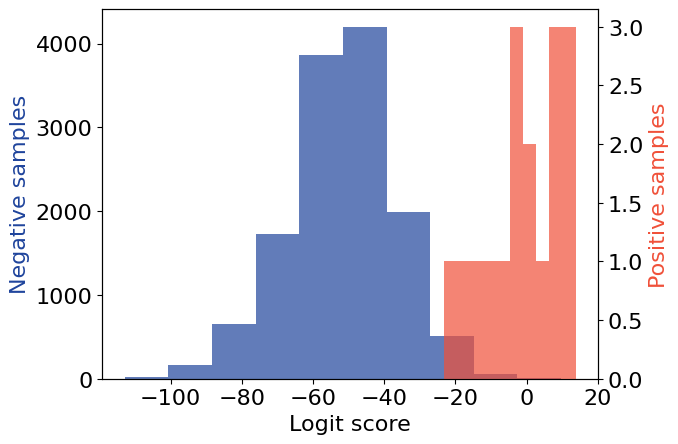

In [60]:
# Logit values for ascending calls
fig, ax1 = plt.subplots()
ax1.hist(hdor_asc_neg, color='#1f449c', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylabel('Negative samples', color='#1f449c', fontsize=16)

ax2 = ax1.twinx()
ax2.hist(hdor_asc_pos, color='#f05039', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='black')  #e57a77
ax2.set_ylabel('Positive samples', color='#f05039', fontsize=16)

ax1.set_xlabel('Logit score', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

plt.show()

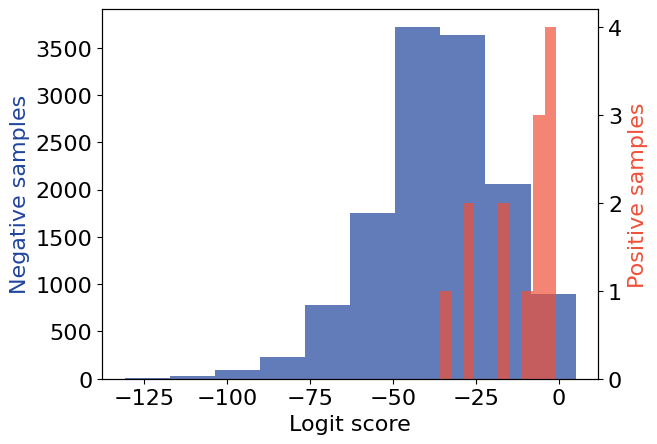

In [61]:
# Logit values for arch calls
fig, ax1 = plt.subplots()
ax1.hist(hdor_arch_neg, color='#1f449c', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylabel('Negative samples', color='#1f449c', fontsize=16)

ax2 = ax1.twinx()
ax2.hist(hdor_arch_pos, color='#f05039', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='black')  #e57a77
ax2.set_ylabel('Positive samples', color='#f05039', fontsize=16)

ax1.set_xlabel('Logit score', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

plt.show()

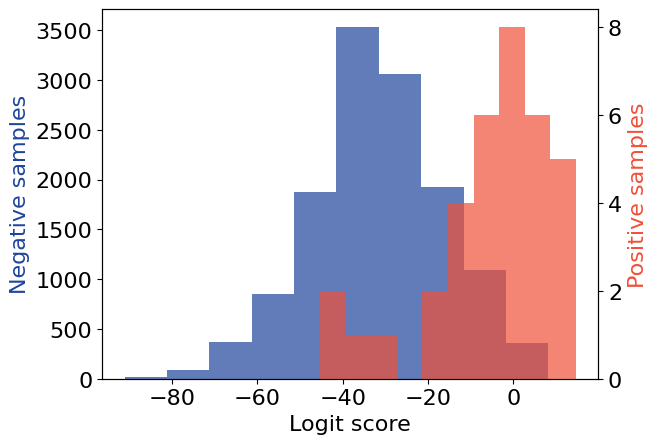

In [62]:
# Logit values for all dormouse calls
fig, ax1 = plt.subplots()
ax1.hist(hdor_all_neg, color='#1f449c', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylabel('Negative samples', color='#1f449c', fontsize=16)

ax2 = ax1.twinx()
ax2.hist(hdor_all_pos, color='#f05039', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='black')  #e57a77
ax2.set_ylabel('Positive samples', color='#f05039', fontsize=16)

ax1.set_xlabel('Logit score', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

plt.show()

In [12]:
# Calculate overall AUC
pred = pred_labels[['hdor_asc_pred', 'hdor_arch_pred', 'hdor_all_pred']]
labels = pred_labels[['hdor_asc_label', 'hdor_arch_label', 'hdor_all_label']]
roc_auc_score(labels, pred, average='weighted', labels=['hdor_asc', 'hdor_arch', 'hdor_all'])

0.9119441490977166

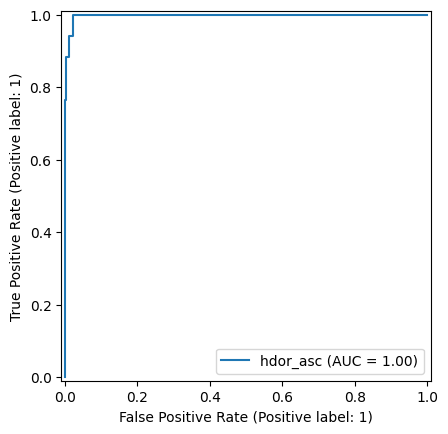

In [13]:
# Plot ROC curve for each class
# Ascending calls
RocCurveDisplay.from_predictions(labels['hdor_asc_label'], pred['hdor_asc_pred'], name='hdor_asc')

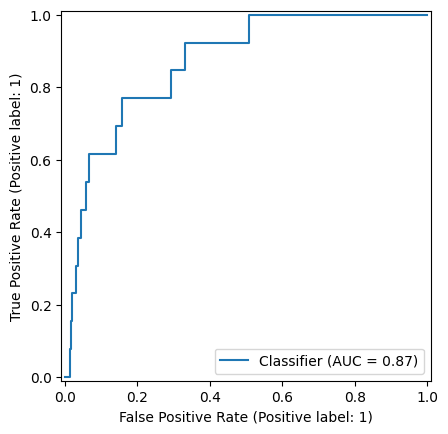

In [14]:
# Arch calls
RocCurveDisplay.from_predictions(labels['hdor_arch_label'], pred['hdor_arch_pred'])

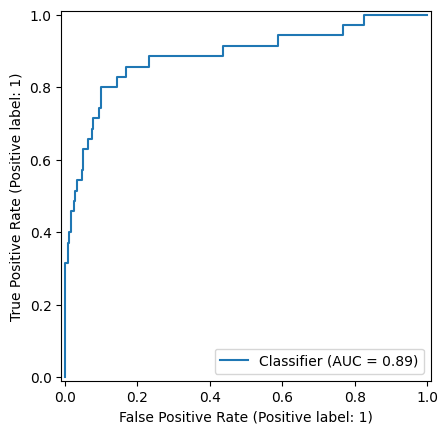

In [15]:
# All dormouse calls
RocCurveDisplay.from_predictions(labels['hdor_all_label'], pred['hdor_all_pred'])

In [16]:
# Get optimal threshold for hdor_asc
fpr, tpr, thresholds = roc_curve(pred_labels['hdor_asc_label'], pred_labels['hdor_asc_pred'])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

threshold_asc = optimal_threshold

print("Optimal threshold:")
print(optimal_threshold)
print("\nTrue positive rate:")
print(tpr[optimal_idx])
print("\nFalse positive rate:")
print(fpr[optimal_idx])

Optimal threshold:
-23.147581

True positive rate:
1.0

False positive rate:
0.022604869908215124


In [17]:
# Get optimal threshold for hdor_arch
fpr, tpr, thresholds = roc_curve(pred_labels['hdor_arch_label'], pred_labels['hdor_arch_pred'])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

threshold_arch = optimal_threshold

print("Optimal threshold:")
print(optimal_threshold)
print("\nTrue positive rate:")
print(tpr[optimal_idx])
print("\nFalse positive rate:")
print(fpr[optimal_idx])

Optimal threshold:
-16.956917

True positive rate:
0.7692307692307693

False positive rate:
0.15621445362857359


In [18]:
# Get optimal threshold for hdor_all
fpr, tpr, thresholds = roc_curve(pred_labels['hdor_all_label'], pred_labels['hdor_all_pred'])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

threshold_all = optimal_threshold

print("Optimal threshold:")
print(optimal_threshold)
print("\nTrue positive rate:")
print(tpr[optimal_idx])
print("\nFalse positive rate:")
print(fpr[optimal_idx])

Optimal threshold:
-10.849104

True positive rate:
0.8

False positive rate:
0.10049373338397266


In [19]:
print("True positives")
print(pred_labels[pred_labels['hdor_asc_pred'] >= threshold_asc].hdor_asc_label.sum())

print("Total positives")
print(len(pred_labels[pred_labels['hdor_asc_pred'] >= threshold_asc]))

True positives
17
Total positives
315


In [20]:
print("True positives")
print(pred_labels[pred_labels['hdor_arch_pred'] >= threshold_arch].hdor_arch_label.sum())

print("Total positives")
print(len(pred_labels[pred_labels['hdor_arch_pred'] >= threshold_arch]))

True positives
10
Total positives
2070


In [21]:
print("True positives")
print(pred_labels[pred_labels['hdor_all_pred'] >= threshold_all].hdor_all_label.sum())

print("Total positives")
print(len(pred_labels[pred_labels['hdor_all_pred'] >= threshold_all]))

True positives
28
Total positives
1351


In [22]:
# Precision-recall curve
precision_asc, recall_asc, thresholds_asc = precision_recall_curve(pred_labels['hdor_asc_label'], pred_labels['hdor_asc_pred'])
precision_arch, recall_arch, thresholds_arch = precision_recall_curve(pred_labels['hdor_arch_label'], pred_labels['hdor_arch_pred'])
precision_all, recall_all, thresholds_all = precision_recall_curve(pred_labels['hdor_all_label'], pred_labels['hdor_all_pred'])

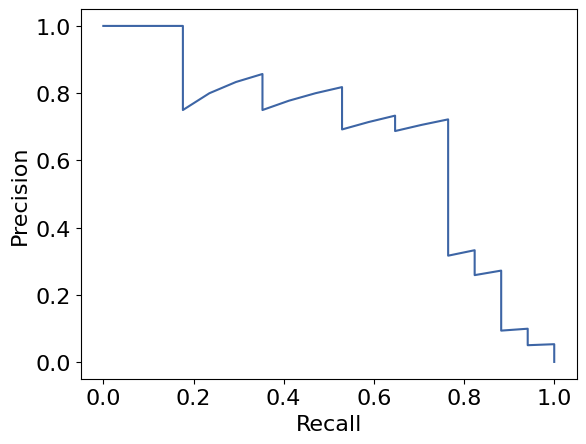

In [57]:
plt.plot(recall_asc, precision_asc, color='#3d65a5')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
# plt.title('Precision-Recall Curve (hdor_asc)')
plt.show()

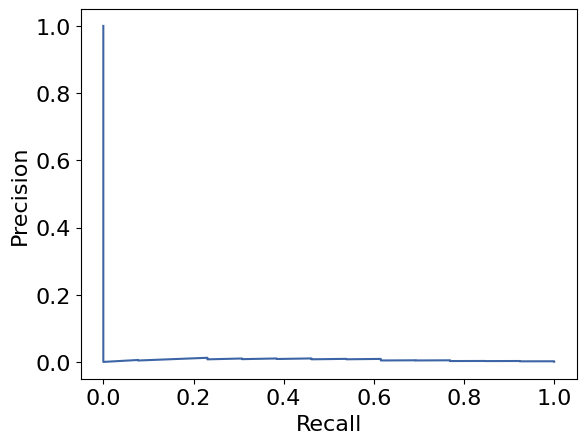

In [58]:
plt.plot(recall_arch, precision_arch, color='#3d65a5')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
# plt.title('Precision-Recall Curve (hdor_arch)')
plt.show()

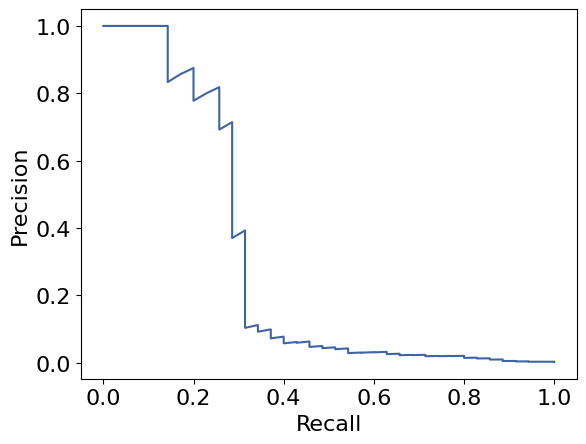

In [59]:
plt.plot(recall_all, precision_all, color='#3d65a5')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
# plt.title('Precision-Recall Curve (hdor_all)')
plt.show()

In [40]:
fscore = (2 * precision_asc * recall_asc) / (precision_asc + recall_asc)
best_index = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds_asc[best_index], fscore[best_index]))

Best Threshold=-5.411945, F-Score=0.743


In [41]:
precision_asc[best_index]

0.7222222222222222

In [42]:
recall_asc[best_index]

0.7647058823529411

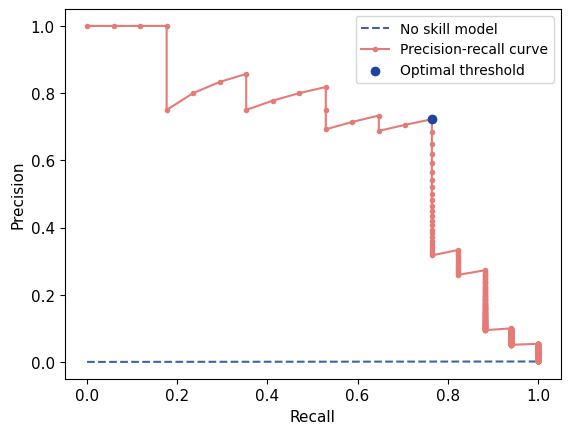

In [55]:
# plot the P-R curve with marker for best threshold
# https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
pos_label_proportion = len(pred_labels[pred_labels['hdor_asc_label']==1]) / len(pred_labels)
plt.plot([0,1], [0,pos_label_proportion], linestyle='--', label='No skill model', color = '#3d65a5')  # Changed 1st y-value to 0
plt.plot(recall_asc, precision_asc, marker='.', label='Precision-recall curve', color = '#e57a77')
plt.scatter(recall_asc[best_index], precision_asc[best_index], marker='o', color='#1f449c', label='Optimal threshold', zorder=2)
plt.xlabel('Recall', fontsize=11)
plt.ylabel('Precision', fontsize=11)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.legend()
plt.show()

In [29]:
# Next step:
# Apply chosen threshold and then use function below to get confusion matrix
# pred_labels needs to contain 0/1 values
# multilabel_confusion_matrix(labels, pred_labels)

In [29]:
fscore.argmax()

12943

In [30]:
fscore[fscore.argmax()]

nan

In [31]:
np.nanargmax(fscore)

12108

In [32]:
fscore[np.nanargmax(fscore)]

0.014519056261343012

In [41]:
# Automate getting F-score for each epoch's (automatically using best threshold)
# Update to relevant model version
model_v = 'v33'
epoch_list = list(range(0,50))
epoch_fscores = []

for epoch in epoch_list:
    # Load in predictions
    pred_labels = pd.read_csv("model_training_checkpoints/model_" + model_v + "/pred_labels_" + model_v + "_epoch-" + str(epoch) + ".csv")

    # Get list of possible thresholds and the resulting precision and recall
    precision_all, recall_all, thresholds_all = precision_recall_curve(pred_labels['hdor_all_label'], pred_labels['hdor_all_pred'])

    # Calculate F-score for each possible threshold and select optimal threshold
    fscore = (2 * precision_all * recall_all) / (precision_all + recall_all)
    best_index = np.nanargmax(fscore)
    best_threshold = thresholds_all[best_index]
    best_fscore = fscore[best_index]
    # print('Best Threshold=%f, F-Score=%.3f' % (thresholds_all[best_index], fscore[best_index]))
    best_recall = recall_all[best_index]
    best_precision = precision_all[best_index]
    
    # Append epoch's fscore to dataframe
    epoch_fscores.append(
        {
            'Epoch': epoch,
            'Threshold': best_threshold,
            'F_score':  best_fscore,
            'Recall': best_recall,
            'Precision': best_precision
        }
    )

/tmp/ipykernel_531/2570644368.py:15: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision_all * recall_all) / (precision_all + recall_all)


In [42]:
fscores_df = pd.DataFrame(epoch_fscores)

In [43]:
fscores_df.sort_values(by=['F_score'], ascending=False)

,Epoch,Threshold,F_score,Recall,Precision
28,28,5.239777,0.480000,0.342857,0.800000
12,12,5.608822,0.458333,0.314286,0.846154
49,49,-2.407648,0.452830,0.342857,0.666667
7,7,9.857244,0.452830,0.342857,0.666667
2,2,6.018096,0.448276,0.371429,0.565217
11,11,6.488571,0.444444,0.342857,0.631579
5,5,9.343363,0.440000,0.314286,0.733333
35,35,7.372981,0.423077,0.314286,0.647059
47,47,3.377507,0.416667,0.285714,0.769231
48,48,0.012024,0.416667,0.285714,0.769231


In [44]:
fscores_df.to_csv("model_training_checkpoints/model_" + model_v + "/fscores_by_epoch_" + model_v + "_hdor_all.csv")